In [73]:
%matplotlib inline

import csv
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [74]:
data_frame = pd.read_csv('final-clustering-features.csv')

In [75]:
data_frame

,State/Region Name,District Name,Township Name,Total Population,% rural,% 0-14,% currently attending school/college,% 10yr and older in paid employment,% in institutions,percentile mean household,...,% cooking fuel that costs natural resources,% cooking fuel that is fuel-based and requires transport,% availability to TV,% availibility to mobile phone,% availiability to radio,% availiability to computer,% availiability to Internet,% availiability to car/truck/van,% availability to 40wheel tractor,% availibility to motor boat
0,Kachin,Myitkyina,Myitkyina,317604,0.223857,0.297987,0.221984,0.605542,0.106230,0.775078,...,0.918998,0.004202,0.680744,0.546462,0.540073,0.076838,0.115571,0.060467,0.020098,0.774182
1,Kachin,Myitkyina,Waingmaw,125544,0.787676,0.348085,0.244990,0.568431,0.054140,0.745918,...,0.976684,0.002362,0.461111,0.257218,0.439676,0.020735,0.022966,0.023841,0.027647,0.630534
2,Kachin,Myitkyina,Injangyang,1732,0.743072,0.351617,0.199192,0.518154,0.180139,0.715465,...,1.000000,0.000000,0.203509,0.077193,0.403509,0.010526,0.003509,0.003509,0.003509,0.368421
3,Kachin,Myitkyina,Tanai,60019,0.376614,0.321615,0.188407,0.660793,0.187241,0.821388,...,0.996248,0.000469,0.516651,0.299719,0.412289,0.020638,0.047960,0.017237,0.015478,0.622538
4,Kachin,Myitkyina,Chipwi,20039,0.860771,0.413643,0.197864,0.527936,0.043365,0.832653,...,0.958258,0.003327,0.432849,0.245312,0.214459,0.017544,0.003025,0.068058,0.016031,0.525408
5,Kachin,Myitkyina,Tsawlaw,6518,0.943541,0.434949,0.235809,0.486693,0.002915,0.869744,...,0.996272,0.000932,0.235788,0.031687,0.363467,0.007456,0.000932,0.004660,0.006524,0.460391
6,Kachin,Mohnyin,Mohnyin,209292,0.729364,0.313385,0.227104,0.595944,0.067604,0.707231,...,0.941245,0.000555,0.665211,0.399450,0.507773,0.025996,0.037252,0.024835,0.070592,0.724118
7,Kachin,Mohnyin,Mogaung,132608,0.811384,0.327944,0.237301,0.608723,0.043836,0.731278,...,0.913447,0.000843,0.638324,0.362117,0.408748,0.023857,0.040124,0.024821,0.058398,0.682464
8,Kachin,Mohnyin,Hpakant,331708,0.801461,0.212440,0.104854,0.781014,0.489014,0.664429,...,0.988999,0.000737,0.666821,0.458261,0.318956,0.027544,0.020010,0.066881,0.015287,0.749945
9,Kachin,Bhamo,Bhamo,135877,0.568021,0.304371,0.192829,0.598581,0.129264,0.703173,...,0.839411,0.000621,0.695046,0.406440,0.513927,0.041886,0.049584,0.043541,0.108853,0.769546


In [76]:
features = data_frame.iloc[:, 4:]

In [77]:
features

,% rural,% 0-14,% currently attending school/college,% 10yr and older in paid employment,% in institutions,percentile mean household,% HQ housing,% LQ housing,% households with access to safe sanitation,% households w/ electricity as source,...,% cooking fuel that costs natural resources,% cooking fuel that is fuel-based and requires transport,% availability to TV,% availibility to mobile phone,% availiability to radio,% availiability to computer,% availiability to Internet,% availiability to car/truck/van,% availability to 40wheel tractor,% availibility to motor boat
0,0.223857,0.297987,0.221984,0.605542,0.106230,0.775078,0.310947,0.689053,0.836056,0.509156,...,0.918998,0.004202,0.680744,0.546462,0.540073,0.076838,0.115571,0.060467,0.020098,0.774182
1,0.787676,0.348085,0.244990,0.568431,0.054140,0.745918,0.172616,0.827384,0.810542,0.119335,...,0.976684,0.002362,0.461111,0.257218,0.439676,0.020735,0.022966,0.023841,0.027647,0.630534
2,0.743072,0.351617,0.199192,0.518154,0.180139,0.715465,0.024561,0.975439,0.456140,0.164912,...,1.000000,0.000000,0.203509,0.077193,0.403509,0.010526,0.003509,0.003509,0.003509,0.368421
3,0.376614,0.321615,0.188407,0.660793,0.187241,0.821388,0.110811,0.889189,0.877814,0.163813,...,0.996248,0.000469,0.516651,0.299719,0.412289,0.020638,0.047960,0.017237,0.015478,0.622538
4,0.860771,0.413643,0.197864,0.527936,0.043365,0.832653,0.079250,0.920750,0.416818,0.337871,...,0.958258,0.003327,0.432849,0.245312,0.214459,0.017544,0.003025,0.068058,0.016031,0.525408
5,0.943541,0.434949,0.235809,0.486693,0.002915,0.869744,0.003728,0.996272,0.243243,0.141659,...,0.996272,0.000932,0.235788,0.031687,0.363467,0.007456,0.000932,0.004660,0.006524,0.460391
6,0.729364,0.313385,0.227104,0.595944,0.067604,0.707231,0.150093,0.849907,0.942406,0.299758,...,0.941245,0.000555,0.665211,0.399450,0.507773,0.025996,0.037252,0.024835,0.070592,0.724118
7,0.811384,0.327944,0.237301,0.608723,0.043836,0.731278,0.164833,0.835167,0.920395,0.434453,...,0.913447,0.000843,0.638324,0.362117,0.408748,0.023857,0.040124,0.024821,0.058398,0.682464
8,0.801461,0.212440,0.104854,0.781014,0.489014,0.664429,0.055880,0.944120,0.864190,0.145938,...,0.988999,0.000737,0.666821,0.458261,0.318956,0.027544,0.020010,0.066881,0.015287,0.749945
9,0.568021,0.304371,0.192829,0.598581,0.129264,0.703173,0.194694,0.805306,0.902901,0.410455,...,0.839411,0.000621,0.695046,0.406440,0.513927,0.041886,0.049584,0.043541,0.108853,0.769546


In [78]:
kmeans = KMeans(n_clusters=3).fit(features)

In [79]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0,

In [80]:
data_frame['cluster'] = kmeans.labels_

In [81]:
data_frame

,State/Region Name,District Name,Township Name,Total Population,% rural,% 0-14,% currently attending school/college,% 10yr and older in paid employment,% in institutions,percentile mean household,...,% cooking fuel that is fuel-based and requires transport,% availability to TV,% availibility to mobile phone,% availiability to radio,% availiability to computer,% availiability to Internet,% availiability to car/truck/van,% availability to 40wheel tractor,% availibility to motor boat,cluster
0,Kachin,Myitkyina,Myitkyina,317604,0.223857,0.297987,0.221984,0.605542,0.106230,0.775078,...,0.004202,0.680744,0.546462,0.540073,0.076838,0.115571,0.060467,0.020098,0.774182,0
1,Kachin,Myitkyina,Waingmaw,125544,0.787676,0.348085,0.244990,0.568431,0.054140,0.745918,...,0.002362,0.461111,0.257218,0.439676,0.020735,0.022966,0.023841,0.027647,0.630534,1
2,Kachin,Myitkyina,Injangyang,1732,0.743072,0.351617,0.199192,0.518154,0.180139,0.715465,...,0.000000,0.203509,0.077193,0.403509,0.010526,0.003509,0.003509,0.003509,0.368421,1
3,Kachin,Myitkyina,Tanai,60019,0.376614,0.321615,0.188407,0.660793,0.187241,0.821388,...,0.000469,0.516651,0.299719,0.412289,0.020638,0.047960,0.017237,0.015478,0.622538,0
4,Kachin,Myitkyina,Chipwi,20039,0.860771,0.413643,0.197864,0.527936,0.043365,0.832653,...,0.003327,0.432849,0.245312,0.214459,0.017544,0.003025,0.068058,0.016031,0.525408,1
5,Kachin,Myitkyina,Tsawlaw,6518,0.943541,0.434949,0.235809,0.486693,0.002915,0.869744,...,0.000932,0.235788,0.031687,0.363467,0.007456,0.000932,0.004660,0.006524,0.460391,1
6,Kachin,Mohnyin,Mohnyin,209292,0.729364,0.313385,0.227104,0.595944,0.067604,0.707231,...,0.000555,0.665211,0.399450,0.507773,0.025996,0.037252,0.024835,0.070592,0.724118,0
7,Kachin,Mohnyin,Mogaung,132608,0.811384,0.327944,0.237301,0.608723,0.043836,0.731278,...,0.000843,0.638324,0.362117,0.408748,0.023857,0.040124,0.024821,0.058398,0.682464,0
8,Kachin,Mohnyin,Hpakant,331708,0.801461,0.212440,0.104854,0.781014,0.489014,0.664429,...,0.000737,0.666821,0.458261,0.318956,0.027544,0.020010,0.066881,0.015287,0.749945,0
9,Kachin,Bhamo,Bhamo,135877,0.568021,0.304371,0.192829,0.598581,0.129264,0.703173,...,0.000621,0.695046,0.406440,0.513927,0.041886,0.049584,0.043541,0.108853,0.769546,0


In [82]:
feature_names = data_frame.columns.values

In [83]:
feature_names

array(['State/Region Name', 'District Name', 'Township Name',
       'Total Population', '% rural', '% 0-14',
       '% currently attending school/college',
       '% 10yr and older in paid employment', '% in institutions',
       'percentile mean household', '% HQ housing', '% LQ housing',
       '% households with access to safe sanitation',
       '% households w/ electricity as source',
       '% households w/ solar systems as source',
       '% households w/ relatively efficient sources of lighting',
       '% households w/ relatively poor sources of lighting',
       '% cooking fuel electricity',
       '% cooking fuel that costs natural resources',
       '% cooking fuel that is fuel-based and requires transport',
       '% availability to TV', '% availibility to mobile phone',
       '% availiability to radio', '% availiability to computer',
       '% availiability to Internet', '% availiability to car/truck/van',
       '% availability to 40wheel tractor', '% availibility to m

In [84]:
pairwise_features = ['Total Population', \
                     '% households w/ solar systems as source', \
                     '% households w/ electricity as source', \
                     '% households w/ relatively efficient sources of lighting', \
                     '% households w/ relatively poor sources of lighting', \
                     '% cooking fuel electricity', \
                     '% cooking fuel that is fuel-based and requires transport', \
                     '% cooking fuel that costs natural resources', \
                     '% households with access to safe sanitation', \
                     '% 10yr and older in paid employment', \
                     '% rural']

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


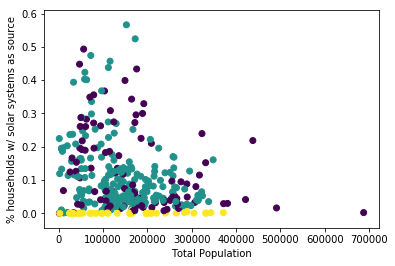

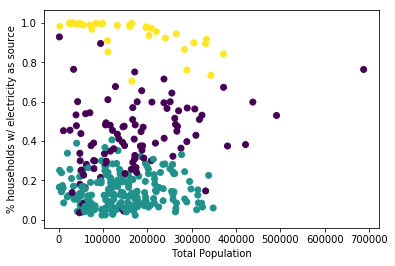

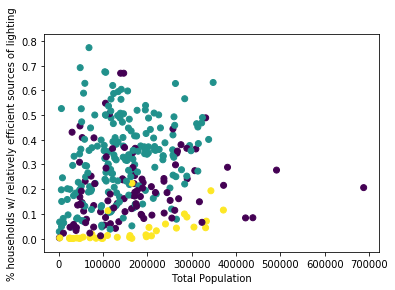

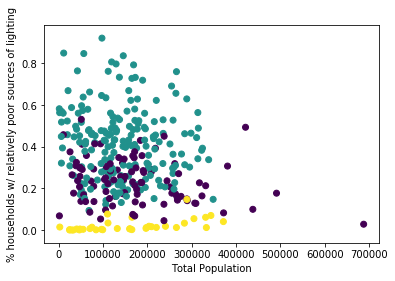

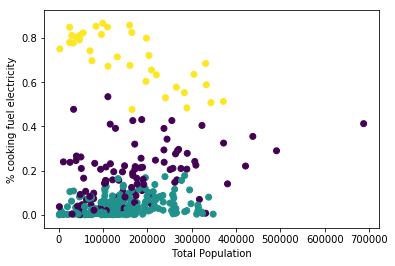

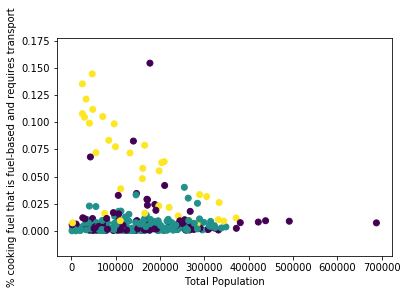

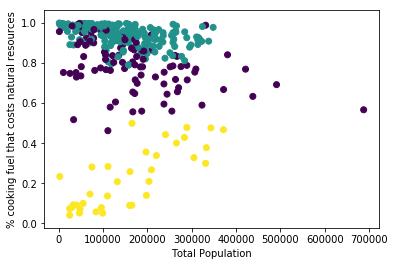

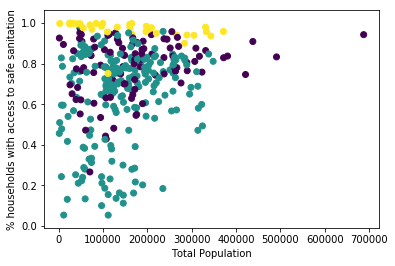

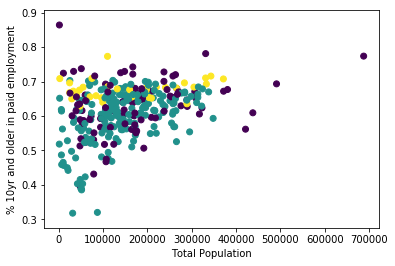

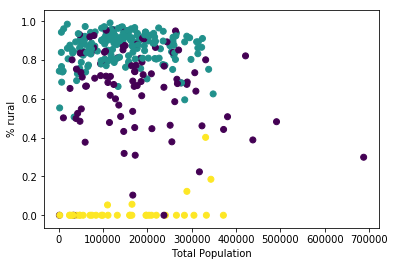

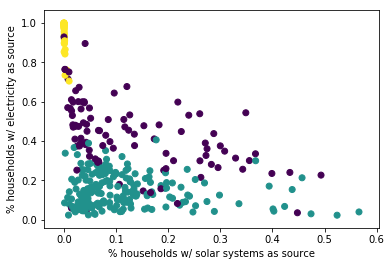

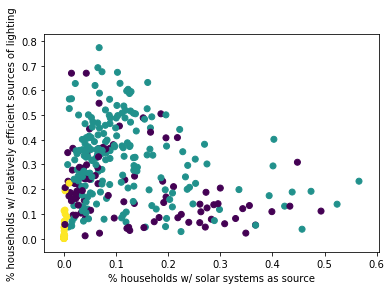

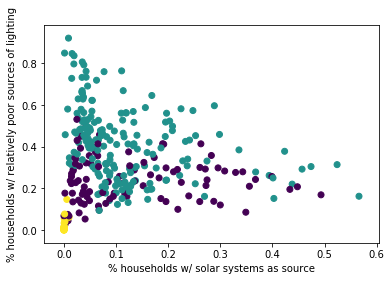

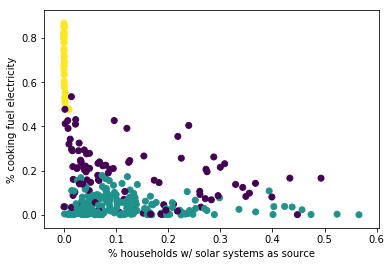

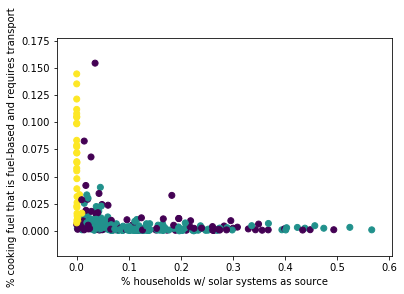

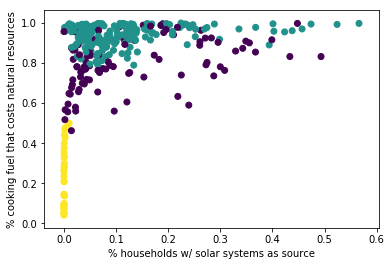

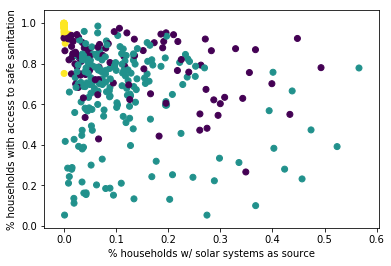

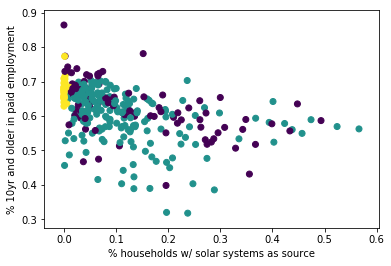

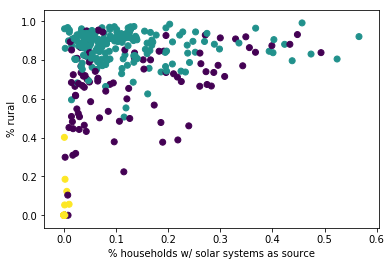

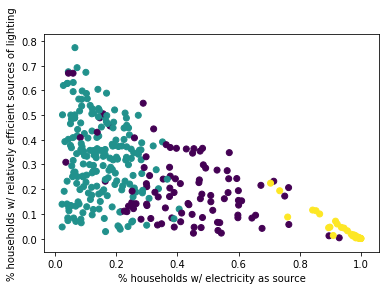

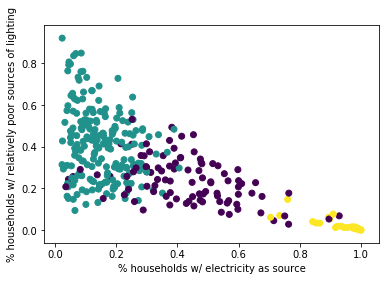

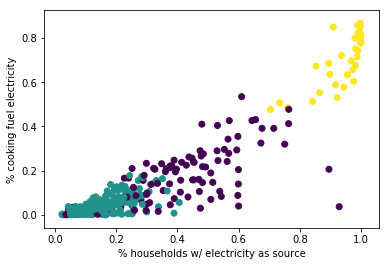

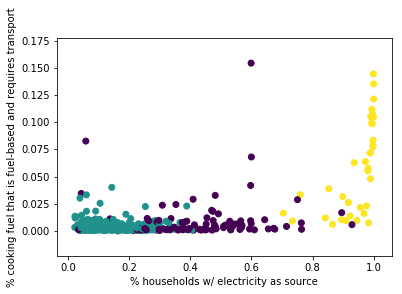

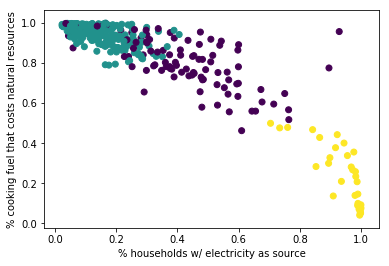

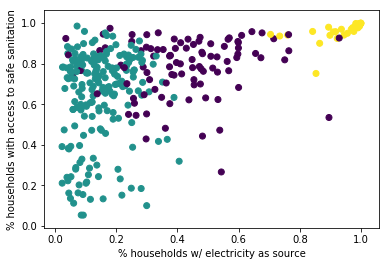

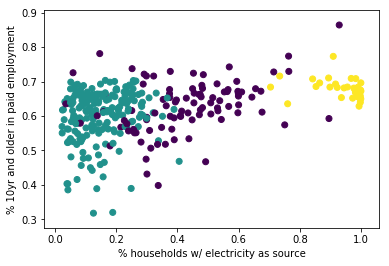

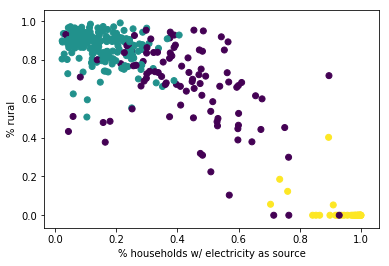

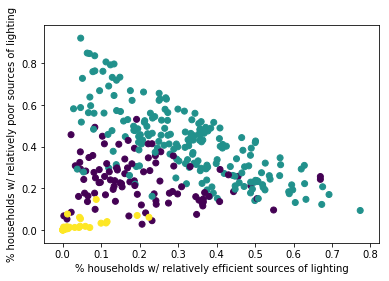

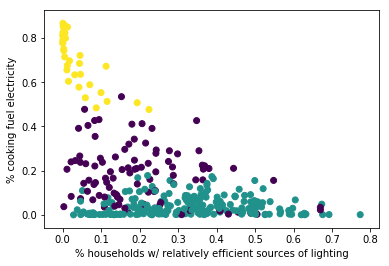

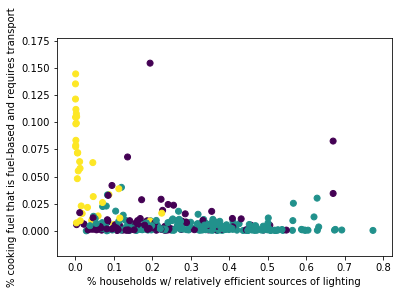

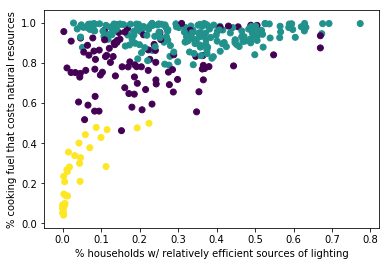

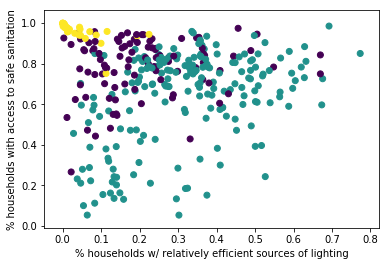

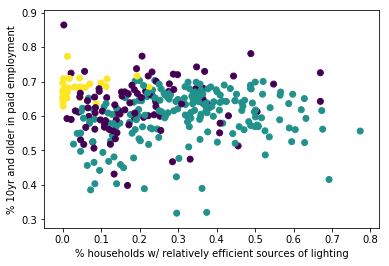

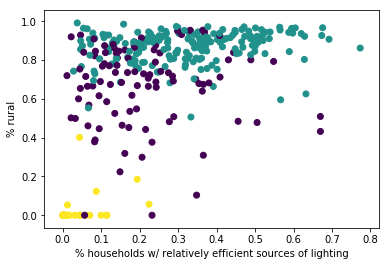

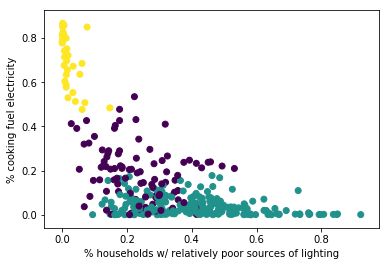

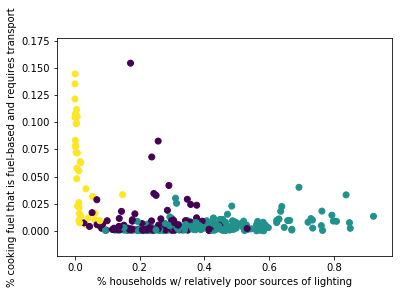

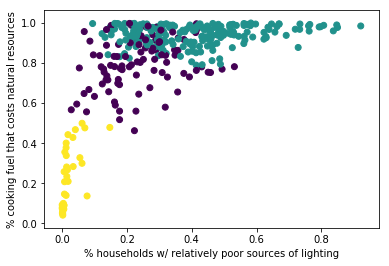

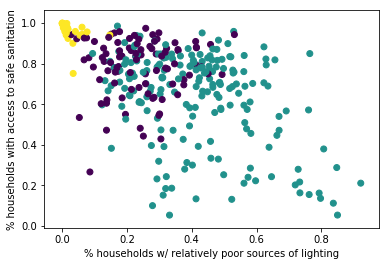

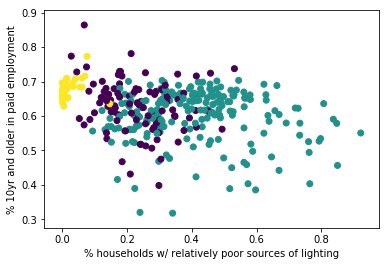

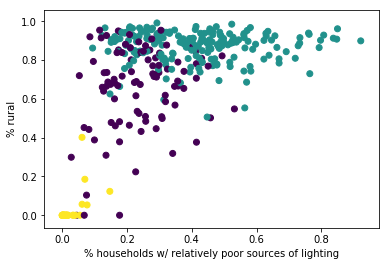

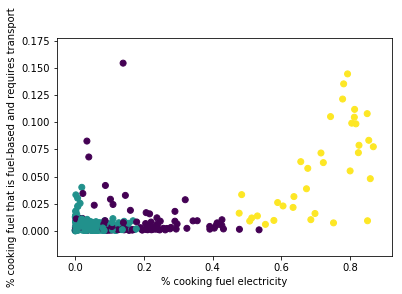

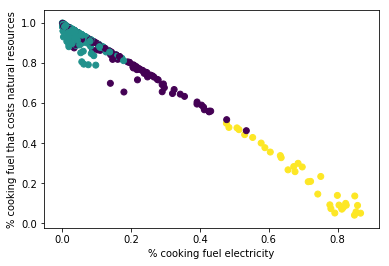

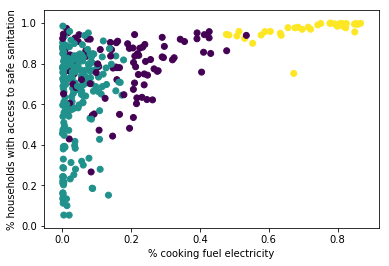

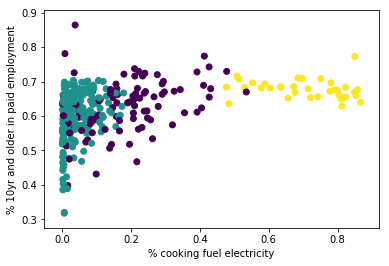

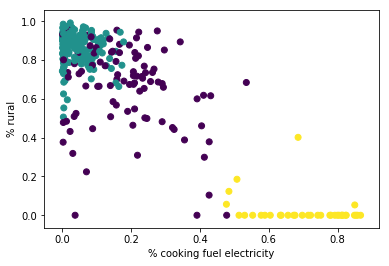

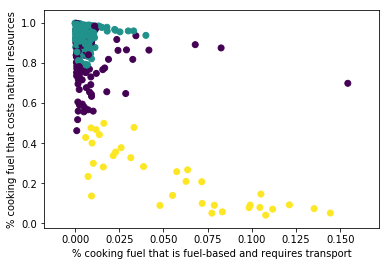

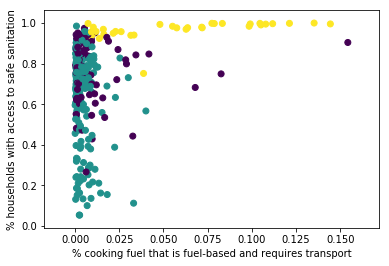

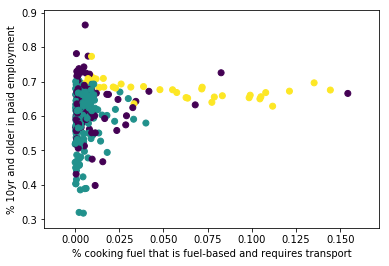

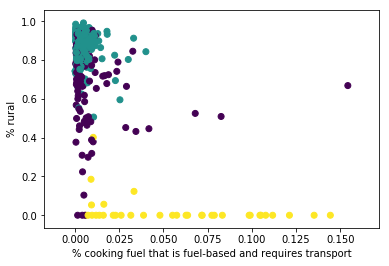

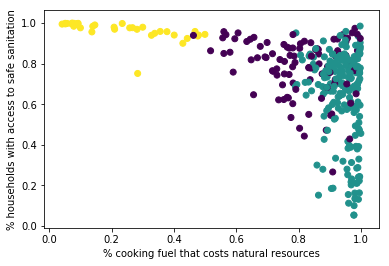

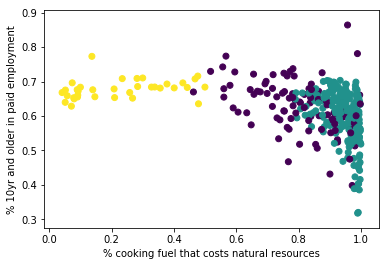

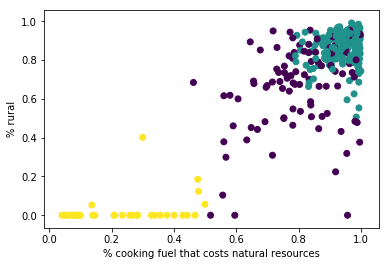

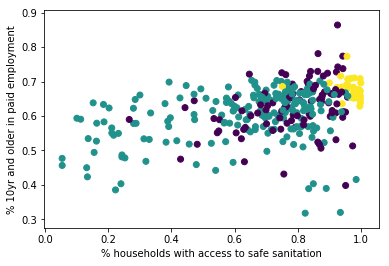

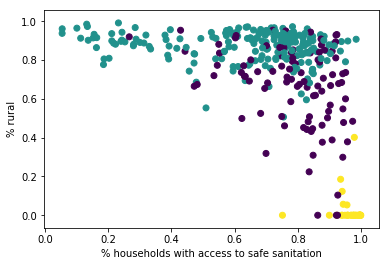

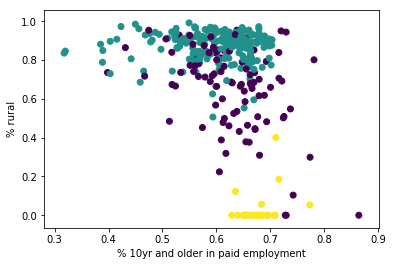

In [85]:
for x in range(len(pairwise_features)):
    for y in range(x + 1, len(pairwise_features)):
        x_label = pairwise_features[x]
        y_label = pairwise_features[y]
        plt.figure()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        plt.scatter(data_frame[x_label], data_frame[y_label], c=data_frame['cluster'])
        plt.show()
        plt.savefig('figures/' + str(x) + '-' + str(y) + '.png')

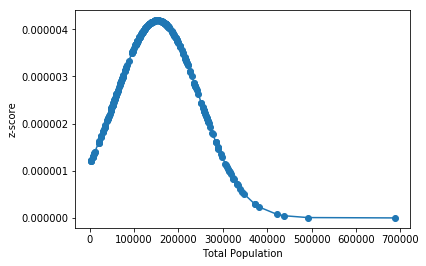

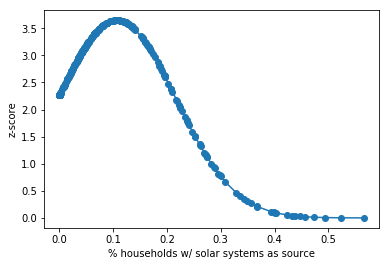

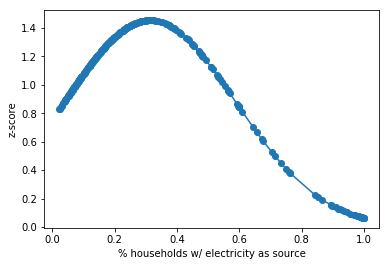

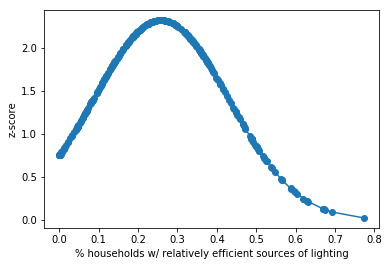

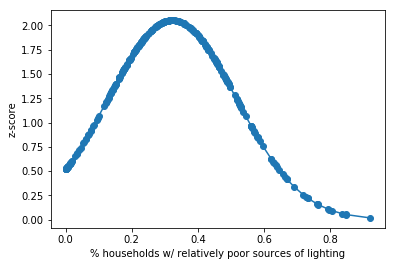

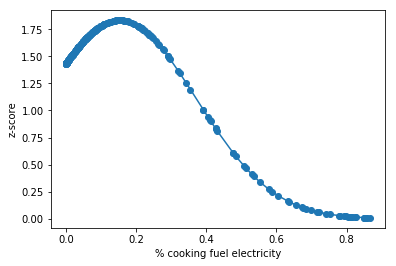

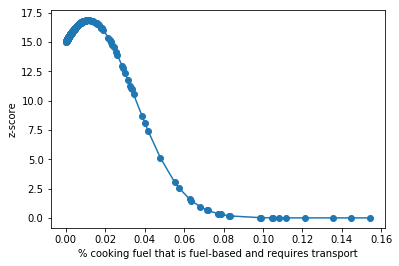

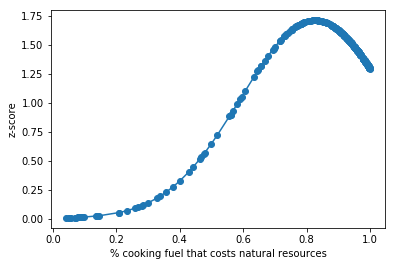

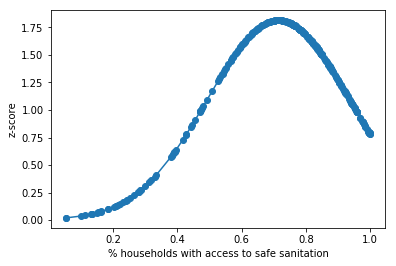

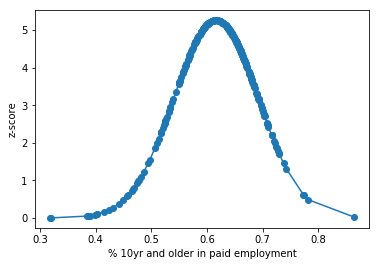

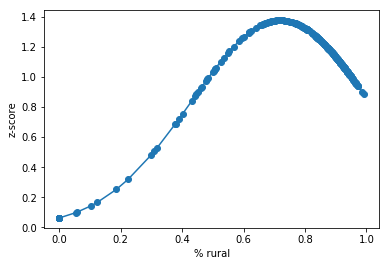

In [88]:
for f in pairwise_features:
    plt.figure()
    vals = sorted(data_frame[f])
    mean = np.mean(data_frame[f])
    std = np.std(data_frame[f])
    pdf = stats.norm.pdf(vals, mean, std)
    plt.xlabel(f)
    plt.ylabel('z-score')
    plt.plot(vals, pdf, '-o')

In [91]:
for f in pairwise_features:
    print(data_frame.groupby('cluster')[f].mean())

cluster
0    169897
1    142741
2    158198
Name: Total Population, dtype: int64
cluster
0    0.129397
1    0.114310
2    0.000835
Name: % households w/ solar systems as source, dtype: float64
cluster
0    0.422852
1    0.148434
2    0.940562
Name: % households w/ electricity as source, dtype: float64
cluster
0    0.208527
1    0.321064
2    0.036415
Name: % households w/ relatively efficient sources of lighting, dtype: float64
cluster
0    0.239223
1    0.416192
2    0.022188
Name: % households w/ relatively poor sources of lighting, dtype: float64
cluster
0    0.182136
1    0.041419
2    0.707034
Name: % cooking fuel electricity, dtype: float64
cluster
0    0.009265
1    0.004489
2    0.056607
Name: % cooking fuel that is fuel-based and requires transport, dtype: float64
cluster
0    0.802777
1    0.941417
2    0.229337
Name: % cooking fuel that costs natural resources, dtype: float64
cluster
0    0.786419
1    0.634281
2    0.965798
Name: % households with access to safe sanitation,